In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pickle
import copy

import pandas as pd
import time

from interpolate_over import InterpolateOverDefectGaussianProcess, meanify
from lsst.meas.algorithms import CloughTocher2DInterpolatorUtils as ctUtils

#%matplotlib widget

treegp | Cholesky + Binned 2d Scipy | spanset


100%|██████████| 9/9 [00:01<00:00,  5.71it/s]


time for InterpolateOverDefectGaussianProcess.interpolate_over_defects = 1.5864


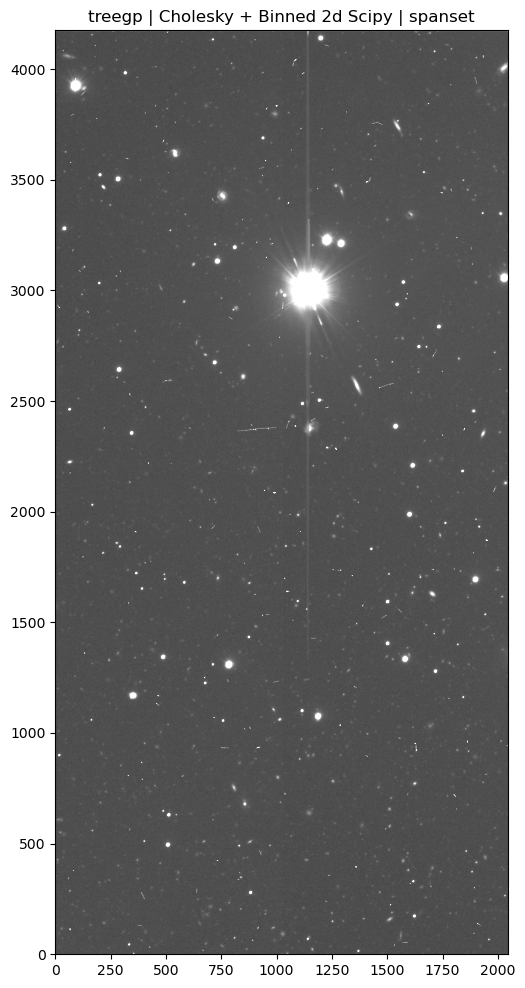

In [2]:
dic = pickle.load(open("data/out_test_0.pkl", "rb"))
maskedImage = dic['in']['maskedImage']

#solvers = ['treegp', 'george', 'gpytorch']
#solvers_method = ['cholesky', 'HODLR', 'GPExact']
#methods = ['block', 'spanset']
solvers = ['treegp']
solvers_method = ['Cholesky + Binned 2d Scipy']
methods = ['spanset']


# Create an empty dataframe to store the results
df = pd.DataFrame(columns=['Solver', 'Method', 'Time'])

for i, s in enumerate(solvers):
    for m in methods:
        print(f'{s} | {solvers_method[i]} | {m}')
        to_interpolate = copy.deepcopy(maskedImage)
        GP = InterpolateOverDefectGaussianProcess(to_interpolate, defects=["SAT"],
                                                  fwhm=15, block_size=40, solver=s,
                                                  method=m, bin_spacing=15, use_binning=True)

        # Perform the interpolation and record the time for each solver and method
        start_time = time.time()
        GP.interpolate_over_defects()
        end_time = time.time()
        execution_time = end_time - start_time

        # Append the results to the dataframe
        # df = pd.concat([df, pd.DataFrame({'Solver': [s], 'Method': [m], 'Time': [execution_time]})], ignore_index=True)

        plt.figure(figsize=(12, 12))
        plt.imshow(GP.maskedImage.getImage().array, vmin=400, vmax=800, cmap=plt.cm.Greys_r)
        plt.gca().invert_yaxis()
        plt.title(f'{s} | {solvers_method[i]} | {m}')
        plt.savefig(f'{s}_{solvers_method[i]}_{m}.png')

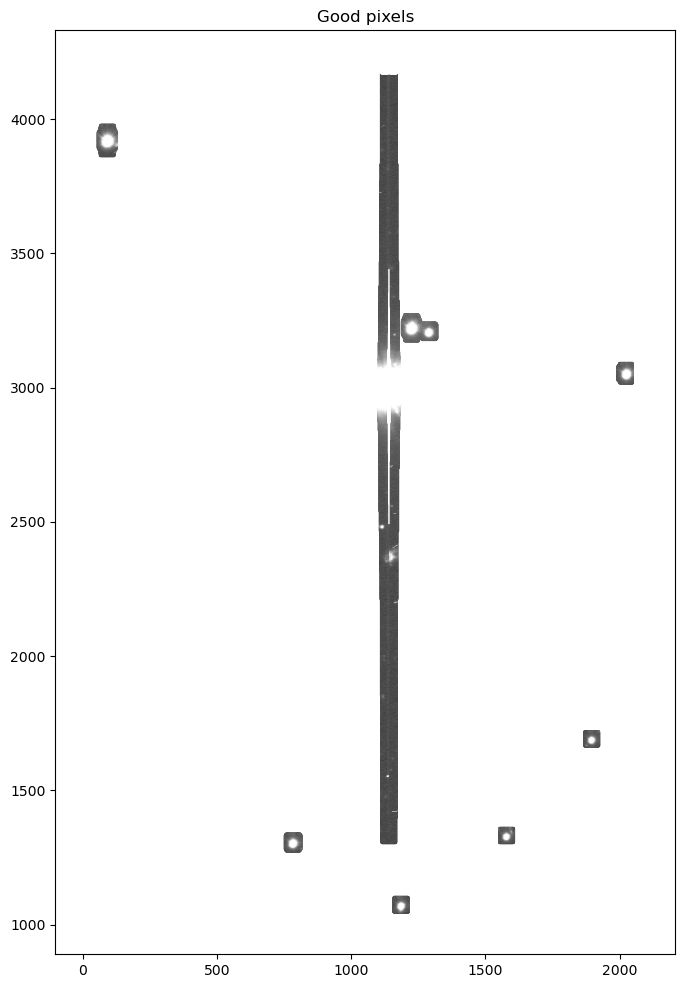

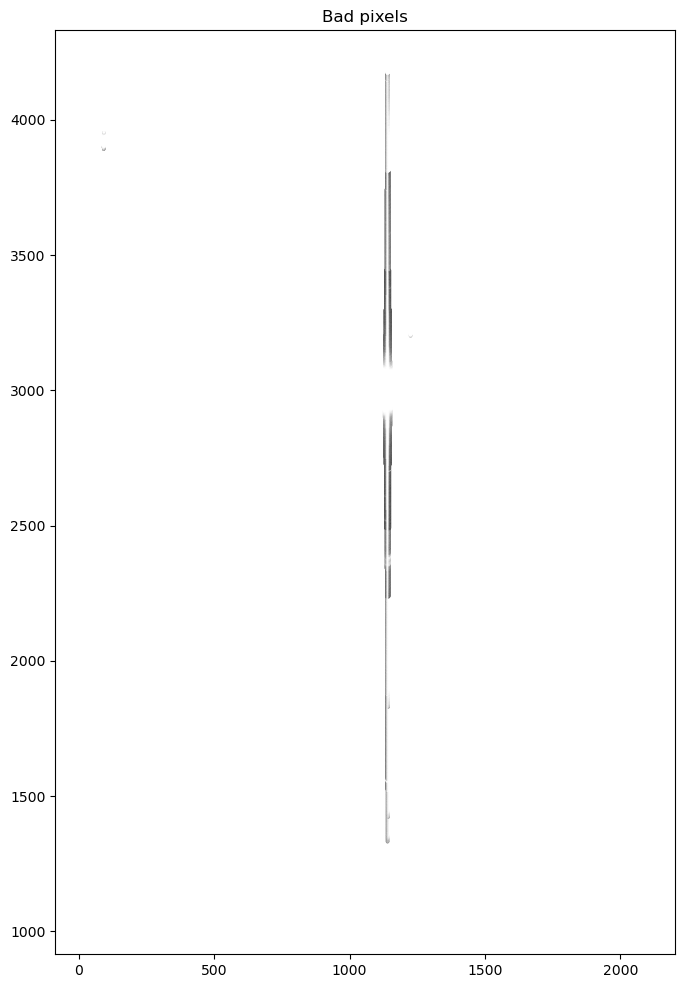

In [3]:
dic = pickle.load(open("data/out_test_0.pkl", "rb"))
maskedImage = dic['in']['maskedImage']


bad_pixel, good_pixel = ctUtils.findGoodPixelsAroundBadPixels(maskedImage, ["SAT"], buffer=25)

plt.figure(figsize=(8,12))
plt.scatter(good_pixel[:,0], good_pixel[:,1],
            c=good_pixel[:,2],
            vmin=400, vmax=800, cmap=plt.cm.Greys_r, s=1)
plt.axis('equal')
xlim = plt.xlim()
ylim = plt.ylim()
plt.title('Good pixels')
plt.savefig('good_pixel.png')


plt.figure(figsize=(8,12))
plt.scatter(bad_pixel[:,0], bad_pixel[:,1],
            c=bad_pixel[:,2],
            vmin=400, vmax=800, cmap=plt.cm.Greys_r, s=1)
plt.axis('equal')
xlim = plt.xlim()
ylim = plt.ylim()
plt.title('Bad pixels')
plt.savefig('bad_pixel.png')